# Data Analysis Basics

This notbook will go over a few basic routines, getting you familier with Pandas, BioRead and MatPlotLib.
We will use two main files - an output file from a Doors task, and a processed EDA file from a TIM task.


## Pandas

Pandas is the best package used to store and manipulate data.
It allows us to store data in a data structure called a DataFrame - a table-like structure that allows easy access to every row and column, manipulation of data in bulks (math operation, statistical operation, etc), and techniques of filling information and diving the data in order to get exactly the information that we want.


### Loading the data

We can get data in many forms - Databases, Excel files, lists etc. In our case, we will get most of the data from an Acq file (over which we will go over later) or from a CSV file. CSV stands for comma-seperated-values, and it's a file (can be opened also from excel or notepad) that stores all the data with seperation of commas between each value of a row, reducing the size a regular Excel table takes while making loading the data easier.
For example, this is what a CSV file looks like in its regular form:


<img alt="image.png" src="./image.png">


The first line, starting with a comma ',', marks the beginning of the header line - containing the names of each column.
for every other line, each of the values between commas is the value for that row, and column corresponding to the location. for example, in the second line, the word 'VAS1' is the th in the line, and is the value of the column Section.

The same file looks like this in excel:

<img alt="img.png" src="./img.png">

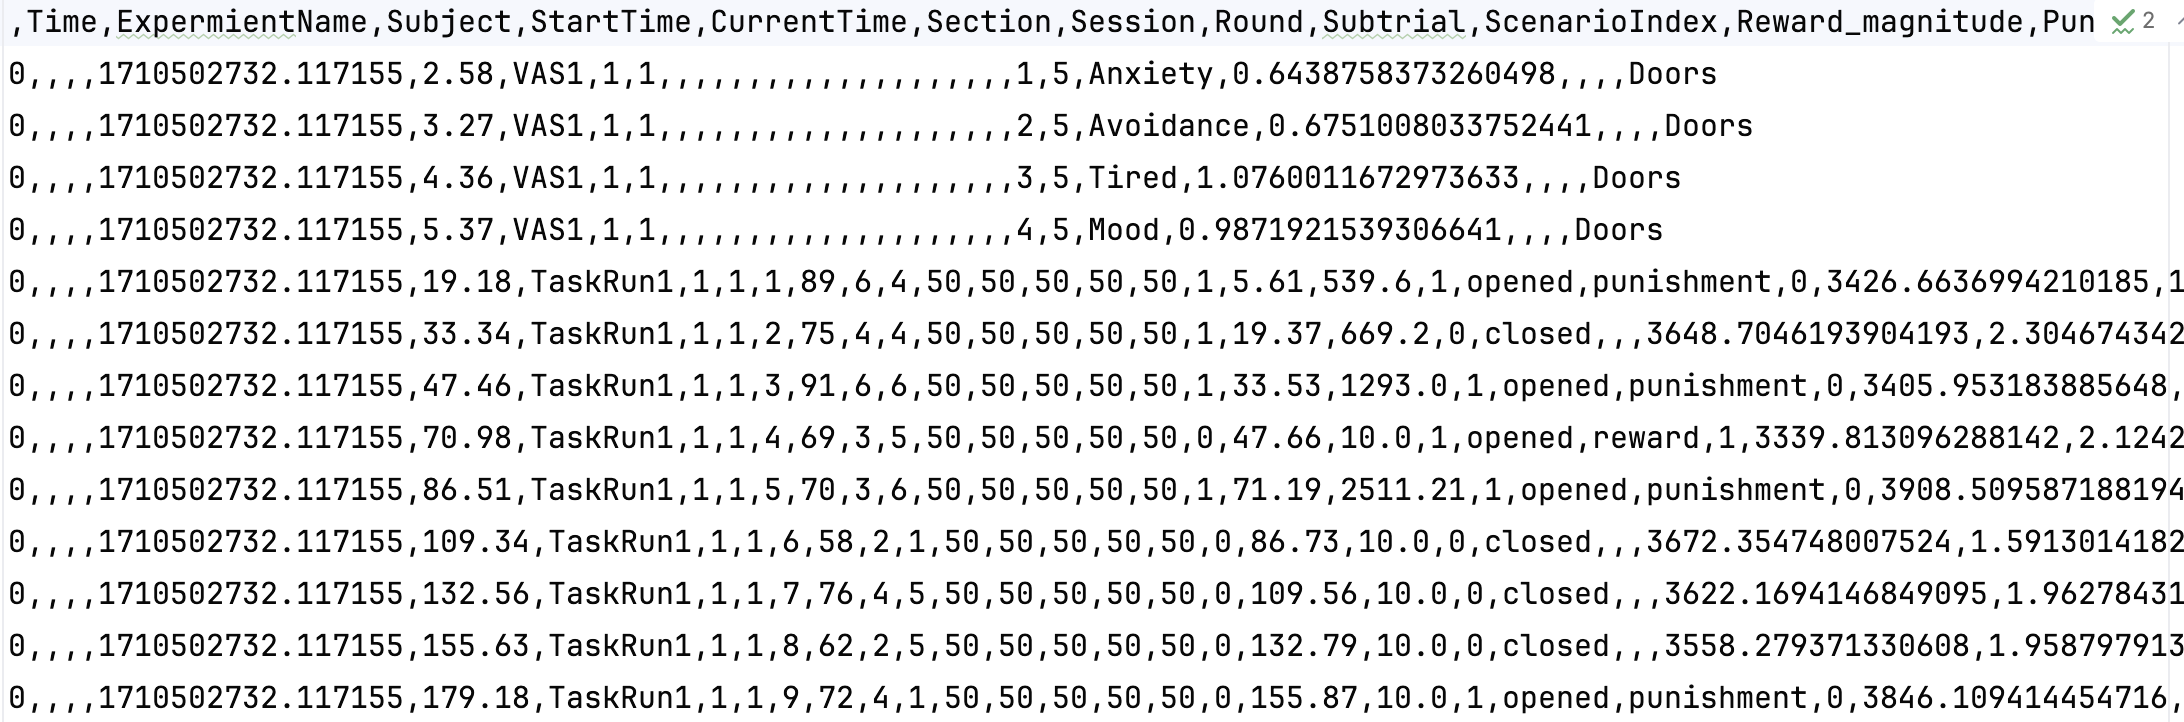

#### The actual loading
In order to load data from a CSV file, we'll use the `pandas.read_csv()` command.

In [95]:
import numpy as np
import pandas as pd
import pandas.plotting

df = pd.read_csv('./DoorsExample.csv')

We can then take a glimpse of the new DataFrame to make sure everything is ok using `pandas.head()`:

In [96]:
df.head()

,Unnamed: 0,Time,ExpermientName,Subject,StartTime,CurrentTime,Section,Session,Round,Subtrial,...,ITI_duration,Total_coins,VASQuestionNumber,VAS_score,VAS_type,VAS_RT,Q_type,Q_score,Q_RT,ExperimentName
0,0,NaN,NaN,178,1.708866e+09,767.55,VAS1,1,1.0,NaN,...,NaN,NaN,1.0,46.0,Anxiety,13.274485,NaN,NaN,NaN,Doors
1,0,NaN,NaN,178,1.708866e+09,773.75,VAS1,1,1.0,NaN,...,NaN,NaN,2.0,70.0,Avoidance,6.178489,NaN,NaN,NaN,Doors
2,0,NaN,NaN,178,1.708866e+09,777.55,VAS1,1,1.0,NaN,...,NaN,NaN,3.0,24.0,Tired,3.779582,NaN,NaN,NaN,Doors
3,0,NaN,NaN,178,1.708866e+09,786.53,VAS1,1,1.0,NaN,...,NaN,NaN,4.0,66.0,Mood,8.958632,NaN,NaN,NaN,Doors
4,0,NaN,NaN,178,1.708866e+09,988.96,Practice,1,NaN,1.0,...,1.973559,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors


In [97]:
df.columns

Index(['Unnamed: 0', 'Time', 'ExpermientName', 'Subject', 'StartTime',
       'CurrentTime', 'Section', 'Session', 'Round', 'Subtrial',
       'ScenarioIndex', 'Reward_magnitude', 'Punishment_magnitude',
       'DistanceAtStart', 'DistanceFromDoor_SubTrial', 'CurrentDistance',
       'Distance_max', 'Distance_min', 'Distance_lock', 'RoundStartTime',
       'DoorAction_RT', 'Door_opened', 'DoorStatus', 'Door_outcome', 'DidWin',
       'Door_anticipation_time', 'ITI_duration', 'Total_coins',
       'VASQuestionNumber', 'VAS_score', 'VAS_type', 'VAS_RT', 'Q_type',
       'Q_score', 'Q_RT', 'ExperimentName'],
      dtype='object')

Or get a description of the data - several statistical views for each column using `df.describe()`:

In [98]:
df.describe()

,Unnamed: 0,Time,ExpermientName,Subject,StartTime,CurrentTime,Session,Round,Subtrial,ScenarioIndex,...,Door_opened,DidWin,Door_anticipation_time,ITI_duration,Total_coins,VASQuestionNumber,VAS_score,VAS_RT,Q_score,Q_RT
count,123.0,0.0,0.0,123.0,1.230000e+02,123.000000,123.0,120.000000,106.000000,106.000000,...,106.000000,43.000000,106.000000,106.000000,106.000000,17.000000,16.00000,12.000000,5.000000,5.000000
mean,0.0,NaN,NaN,178.0,1.708866e+09,1863.803171,1.0,1.516667,23.311321,73.028302,...,0.405660,0.465116,3522.038744,1.730298,4.716981,2.647059,48.68750,6.246482,52.400000,5.954253
std,0.0,NaN,NaN,0.0,4.787874e-07,499.841412,0.0,0.647988,14.901814,18.653460,...,0.493352,0.504685,280.950259,0.434245,10.134105,1.271868,26.66513,2.834801,17.285832,1.551331
min,0.0,NaN,NaN,178.0,1.708866e+09,767.550000,1.0,0.000000,1.000000,0.000000,...,0.000000,0.000000,3022.153282,1.012973,-18.000000,1.000000,1.00000,3.267413,36.000000,4.465126
25%,0.0,NaN,NaN,178.0,1.708866e+09,1471.940000,1.0,1.000000,10.000000,62.000000,...,0.000000,0.000000,3255.763331,1.346415,-1.000000,2.000000,31.00000,4.226608,36.000000,5.083867
50%,0.0,NaN,NaN,178.0,1.708866e+09,1886.290000,1.0,2.000000,23.000000,75.000000,...,0.000000,0.000000,3555.839511,1.713364,5.000000,3.000000,55.50000,6.030005,50.000000,5.396089
75%,0.0,NaN,NaN,178.0,1.708866e+09,2285.960000,1.0,2.000000,36.000000,86.750000,...,1.000000,1.000000,3726.090129,2.092612,12.000000,4.000000,72.25000,7.147005,66.000000,6.392436
max,0.0,NaN,NaN,178.0,1.708866e+09,2638.860000,1.0,3.000000,49.000000,99.000000,...,1.000000,1.000000,3998.351551,2.492034,22.000000,5.000000,78.00000,13.274485,74.000000,8.433745


### Pre-Processing the Data

In order to make our data useful, and avoid possible mistakes caused by empty cells or irrelevant data, we need to preprocess it.
Some information is not so necessary to us at all, so we can remove it by dropping these columns:

In [99]:
df = df.drop(columns=['Unnamed: 0', 'Time', 'ExpermientName', 'StartTime', 'CurrentTime', 'Session'])
df.head()

,Subject,Section,Round,Subtrial,ScenarioIndex,Reward_magnitude,Punishment_magnitude,DistanceAtStart,DistanceFromDoor_SubTrial,CurrentDistance,...,ITI_duration,Total_coins,VASQuestionNumber,VAS_score,VAS_type,VAS_RT,Q_type,Q_score,Q_RT,ExperimentName
0,178,VAS1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,46.0,Anxiety,13.274485,NaN,NaN,NaN,Doors
1,178,VAS1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,70.0,Avoidance,6.178489,NaN,NaN,NaN,Doors
2,178,VAS1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,24.0,Tired,3.779582,NaN,NaN,NaN,Doors
3,178,VAS1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,66.0,Mood,8.958632,NaN,NaN,NaN,Doors
4,178,Practice,NaN,1.0,0.0,0.0,0.0,0.0,100.0,100.0,...,1.973559,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors


We can also view only specific columns of the data by stating the names of the columns we're interested in:

In [100]:
df[["Punishment_magnitude", "Reward_magnitude", "DistanceFromDoor_SubTrial"]]

,Punishment_magnitude,Reward_magnitude,DistanceFromDoor_SubTrial
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.0,0.0,100.0
...,...,...,...
118,NaN,NaN,NaN
119,NaN,NaN,NaN
120,NaN,NaN,NaN
121,NaN,NaN,NaN


In this case, the first 4 contain answers to the mood-related questions at the beginning of the task, so we can skip them, either by starting from the fourth row:

In [101]:
df[["Punishment_magnitude", "Reward_magnitude", "DistanceFromDoor_SubTrial"]][4:]


,Punishment_magnitude,Reward_magnitude,DistanceFromDoor_SubTrial
4,0.0,0.0,100.0
5,0.0,0.0,0.0
6,0.0,0.0,76.0
7,5.0,6.0,64.0
8,5.0,2.0,18.0
...,...,...,...
118,NaN,NaN,NaN
119,NaN,NaN,NaN
120,NaN,NaN,NaN
121,NaN,NaN,NaN


Or by conditioning on the value in one (or more) of the columns:

In [102]:
df[["Punishment_magnitude", "Reward_magnitude", "DistanceFromDoor_SubTrial"]][df["Section"] == "TaskRun1"]

,Punishment_magnitude,Reward_magnitude,DistanceFromDoor_SubTrial
12,3.0,7.0,50.0
13,5.0,1.0,0.0
14,4.0,1.0,9.0
15,5.0,4.0,32.0
16,1.0,4.0,77.0
17,6.0,7.0,50.0
18,7.0,4.0,43.0
19,3.0,3.0,50.0
20,3.0,5.0,60.0
21,4.0,7.0,80.0


Most of the time, we'll need to divide our data into several dataframes, each with it's own purposes, so we can manipulate it easily.
For example, say I want to find correlations and explore only the task itself, and ignore everything that isn't related such as mood questions and instruction screens.
I can create a DataFrame that only contains the data that I want (both which rows should be taken, and which columns are a point of interest for me):

In [103]:
df_task = df[df["Section"] == "TaskRun1"].copy()

In [104]:
df_task.head()

,Subject,Section,Round,Subtrial,ScenarioIndex,Reward_magnitude,Punishment_magnitude,DistanceAtStart,DistanceFromDoor_SubTrial,CurrentDistance,...,ITI_duration,Total_coins,VASQuestionNumber,VAS_score,VAS_type,VAS_RT,Q_type,Q_score,Q_RT,ExperimentName
12,178,TaskRun1,1.0,1.0,95.0,7.0,3.0,50.0,50.0,50.0,...,1.257621,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
13,178,TaskRun1,1.0,2.0,55.0,1.0,5.0,50.0,0.0,0.0,...,2.241600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
14,178,TaskRun1,1.0,3.0,54.0,1.0,4.0,50.0,9.0,9.0,...,1.034599,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
15,178,TaskRun1,1.0,4.0,76.0,4.0,5.0,50.0,32.0,32.0,...,1.789636,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
16,178,TaskRun1,1.0,5.0,72.0,4.0,1.0,50.0,77.0,77.0,...,1.162985,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors


In [105]:
df_task.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 12 to 60
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Subject                    49 non-null     int64  
 1   Section                    49 non-null     object 
 2   Round                      49 non-null     float64
 3   Subtrial                   49 non-null     float64
 4   ScenarioIndex              49 non-null     float64
 5   Reward_magnitude           49 non-null     float64
 6   Punishment_magnitude       49 non-null     float64
 7   DistanceAtStart            49 non-null     float64
 8   DistanceFromDoor_SubTrial  49 non-null     float64
 9   CurrentDistance            49 non-null     float64
 10  Distance_max               49 non-null     float64
 11  Distance_min               49 non-null     float64
 12  Distance_lock              49 non-null     float64
 13  RoundStartTime             49 non-null     float64
 14  

#### Missing Data

It's important to make sure that cells don't have null values, i.e missing data, otherwise it might affect the graphs and statistics we'll see.
There are several ways to do so, but you should consider the way it affects the credibility of your output.
For example, filling missing data with '0'-s might lower your average significantly.

In case we have specific values we want to insert, we can use the `pd.fillna()` method:

In [106]:
df_task['DidWin'].fillna(0, inplace=True)
df_task

,Subject,Section,Round,Subtrial,ScenarioIndex,Reward_magnitude,Punishment_magnitude,DistanceAtStart,DistanceFromDoor_SubTrial,CurrentDistance,...,ITI_duration,Total_coins,VASQuestionNumber,VAS_score,VAS_type,VAS_RT,Q_type,Q_score,Q_RT,ExperimentName
12,178,TaskRun1,1.0,1.0,95.0,7.0,3.0,50.0,50.0,50.0,...,1.257621,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
13,178,TaskRun1,1.0,2.0,55.0,1.0,5.0,50.0,0.0,0.0,...,2.241600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
14,178,TaskRun1,1.0,3.0,54.0,1.0,4.0,50.0,9.0,9.0,...,1.034599,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
15,178,TaskRun1,1.0,4.0,76.0,4.0,5.0,50.0,32.0,32.0,...,1.789636,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
16,178,TaskRun1,1.0,5.0,72.0,4.0,1.0,50.0,77.0,77.0,...,1.162985,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
17,178,TaskRun1,1.0,6.0,98.0,7.0,6.0,50.0,50.0,50.0,...,2.024037,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
18,178,TaskRun1,1.0,7.0,78.0,4.0,7.0,50.0,43.0,43.0,...,1.920326,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
19,178,TaskRun1,1.0,8.0,67.0,3.0,3.0,50.0,50.0,50.0,...,1.064616,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
20,178,TaskRun1,1.0,9.0,81.0,5.0,3.0,50.0,60.0,60.0,...,1.155772,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
21,178,TaskRun1,1.0,10.0,96.0,7.0,4.0,50.0,80.0,80.0,...,1.890397,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors


In [107]:
df_task['Distance_lock'].fillna(df_task['Distance_lock'].mean(), inplace=True)

### Data Type Validation

It's also important to make sure the data is in the relevant format (mostly numeric) and convert it if not. We don't have a good example right now, but this can be done easily. for example:

In [108]:
df_task['Subtrial'] = df_task['Subtrial'].astype(int)
df_task.head()

,Subject,Section,Round,Subtrial,ScenarioIndex,Reward_magnitude,Punishment_magnitude,DistanceAtStart,DistanceFromDoor_SubTrial,CurrentDistance,...,ITI_duration,Total_coins,VASQuestionNumber,VAS_score,VAS_type,VAS_RT,Q_type,Q_score,Q_RT,ExperimentName
12,178,TaskRun1,1.0,1,95.0,7.0,3.0,50.0,50.0,50.0,...,1.257621,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
13,178,TaskRun1,1.0,2,55.0,1.0,5.0,50.0,0.0,0.0,...,2.241600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
14,178,TaskRun1,1.0,3,54.0,1.0,4.0,50.0,9.0,9.0,...,1.034599,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
15,178,TaskRun1,1.0,4,76.0,4.0,5.0,50.0,32.0,32.0,...,1.789636,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors
16,178,TaskRun1,1.0,5,72.0,4.0,1.0,50.0,77.0,77.0,...,1.162985,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doors


We'll see more examples of how we can pre-process our data later on.
For now, let's go on to visualization.

## Visualization

Visualization, as might be implied from the name, is a way of showing the data visually.
Python has quite a lot of libraries to help us visualize data, we'll go over the two essentials - matplotlib and seaborn.

The difference between the two is very small in the technical sense of how to use each of them, but every library has different variety of graphs and aesthetics (my personal favorite is seaborn).

First of all, we can see the distribution of values in a specific column:


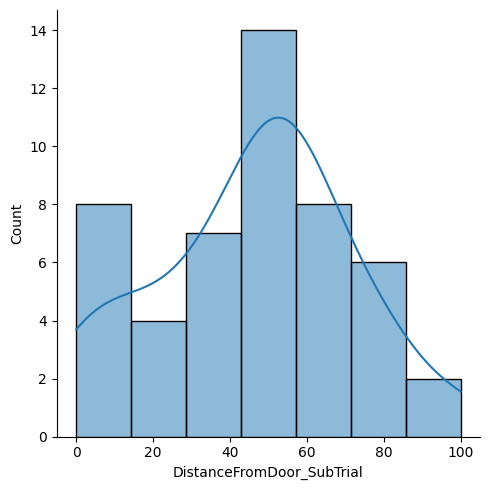

In [109]:
import seaborn as sns
sns.displot(df_task['DistanceFromDoor_SubTrial'], kde=True)

We can also show how the points are scattered using `sns.scatterplot`

<Axes: xlabel='DistanceFromDoor_SubTrial', ylabel='Punishment_magnitude'>

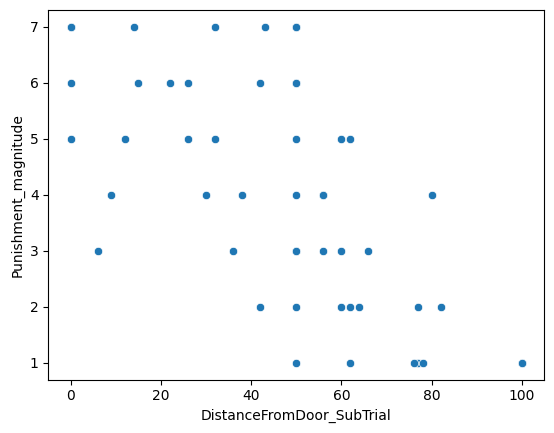

In [110]:
sns.scatterplot(data=df_task, x='DistanceFromDoor_SubTrial', y='Punishment_magnitude')

Say we want to show the average location in which the subject chose to stay, as a function of the reward and punishment he was offered.
We can do this by a scatter plot, with X being the reward and the plot color (hue) as the punismhent:

<Axes: xlabel='Reward_magnitude', ylabel='DistanceFromDoor_SubTrial'>

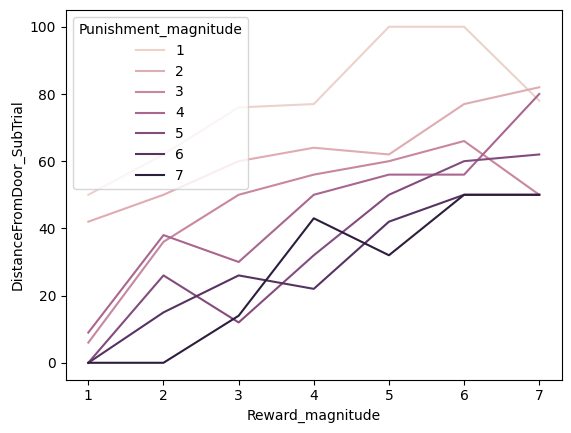

In [111]:
sns.lineplot(data=df_task, x="Reward_magnitude", y="DistanceFromDoor_SubTrial", hue="Punishment_magnitude")

<Axes: xlabel='Punishment_magnitude', ylabel='DistanceFromDoor_SubTrial'>

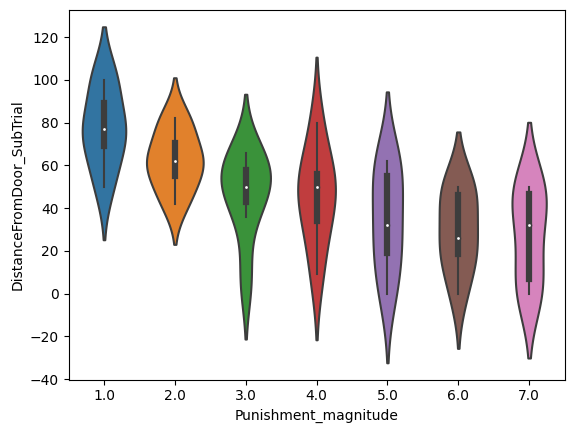

In [112]:
sns.violinplot(data=df_task, x="Punishment_magnitude", y="DistanceFromDoor_SubTrial")

We can also go over the data and check for possible correlation, just to get a sense and some ideas. We can do it with a table:

In [117]:
columns = ['Subtrial', 'ScenarioIndex', 'Reward_magnitude', 'Punishment_magnitude',
           'DistanceAtStart', 'DistanceFromDoor_SubTrial', 'CurrentDistance',
           'Distance_max', 'Distance_min', 'Distance_lock',
           'DoorAction_RT', 'Door_opened', 'DidWin',
           'Door_anticipation_time', 'ITI_duration', 'Total_coins',]
df[columns].corr()

,Subtrial,ScenarioIndex,Reward_magnitude,Punishment_magnitude,DistanceAtStart,DistanceFromDoor_SubTrial,CurrentDistance,Distance_max,Distance_min,Distance_lock,DoorAction_RT,Door_opened,DidWin,Door_anticipation_time,ITI_duration,Total_coins
Subtrial,1.000000,0.051978,-0.045394,-0.063009,0.245229,0.013718,0.013718,-0.038188,0.021268,NaN,-0.177966,0.012453,0.156005,0.081490,0.007563,0.309038
ScenarioIndex,0.051978,1.000000,0.911571,0.313121,0.671324,0.350980,0.350980,0.053000,0.411900,NaN,-0.147882,0.140521,-0.042854,0.055432,-0.010931,0.011429
Reward_magnitude,-0.045394,0.911571,1.000000,0.100336,0.323846,0.581251,0.581251,0.333169,0.582502,NaN,-0.005190,0.261898,-0.026309,0.039454,0.012004,-0.024462
Punishment_magnitude,-0.063009,0.313121,0.100336,1.000000,0.323846,-0.636410,-0.636410,-0.644022,-0.499680,NaN,-0.102363,-0.251507,-0.191022,0.032740,0.150444,-0.002195
DistanceAtStart,0.245229,0.671324,0.323846,0.323846,1.000000,-0.076932,-0.076932,-0.349282,0.039681,NaN,-0.344982,-0.090718,-0.015447,0.055153,-0.096137,0.079814
DistanceFromDoor_SubTrial,0.013718,0.350980,0.581251,-0.636410,-0.076932,1.000000,1.000000,0.750258,0.889944,NaN,0.085951,0.484863,0.116973,-0.002390,-0.065625,0.000316
CurrentDistance,0.013718,0.350980,0.581251,-0.636410,-0.076932,1.000000,1.000000,0.750258,0.889944,NaN,0.085951,0.484863,0.116973,-0.002390,-0.065625,0.000316
Distance_max,-0.038188,0.053000,0.333169,-0.644022,-0.349282,0.750258,0.750258,1.000000,0.394909,NaN,0.348454,0.360286,0.138871,-0.042859,0.026036,-0.039710
Distance_min,0.021268,0.411900,0.582502,-0.499680,0.039681,0.889944,0.889944,0.394909,1.000000,NaN,-0.119499,0.437221,0.035189,-0.000621,-0.125655,0.019783
Distance_lock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Or with a graph:

array([[<Axes: xlabel='Reward_magnitude', ylabel='Reward_magnitude'>,
        <Axes: xlabel='Punishment_magnitude', ylabel='Reward_magnitude'>,
        <Axes: xlabel='DistanceFromDoor_SubTrial', ylabel='Reward_magnitude'>,
        <Axes: xlabel='Distance_max', ylabel='Reward_magnitude'>,
        <Axes: xlabel='Distance_min', ylabel='Reward_magnitude'>,
        <Axes: xlabel='DoorAction_RT', ylabel='Reward_magnitude'>],
       [<Axes: xlabel='Reward_magnitude', ylabel='Punishment_magnitude'>,
        <Axes: xlabel='Punishment_magnitude', ylabel='Punishment_magnitude'>,
        <Axes: xlabel='DistanceFromDoor_SubTrial', ylabel='Punishment_magnitude'>,
        <Axes: xlabel='Distance_max', ylabel='Punishment_magnitude'>,
        <Axes: xlabel='Distance_min', ylabel='Punishment_magnitude'>,
        <Axes: xlabel='DoorAction_RT', ylabel='Punishment_magnitude'>],
       [<Axes: xlabel='Reward_magnitude', ylabel='DistanceFromDoor_SubTrial'>,
        <Axes: xlabel='Punishment_magnitude', ylabe

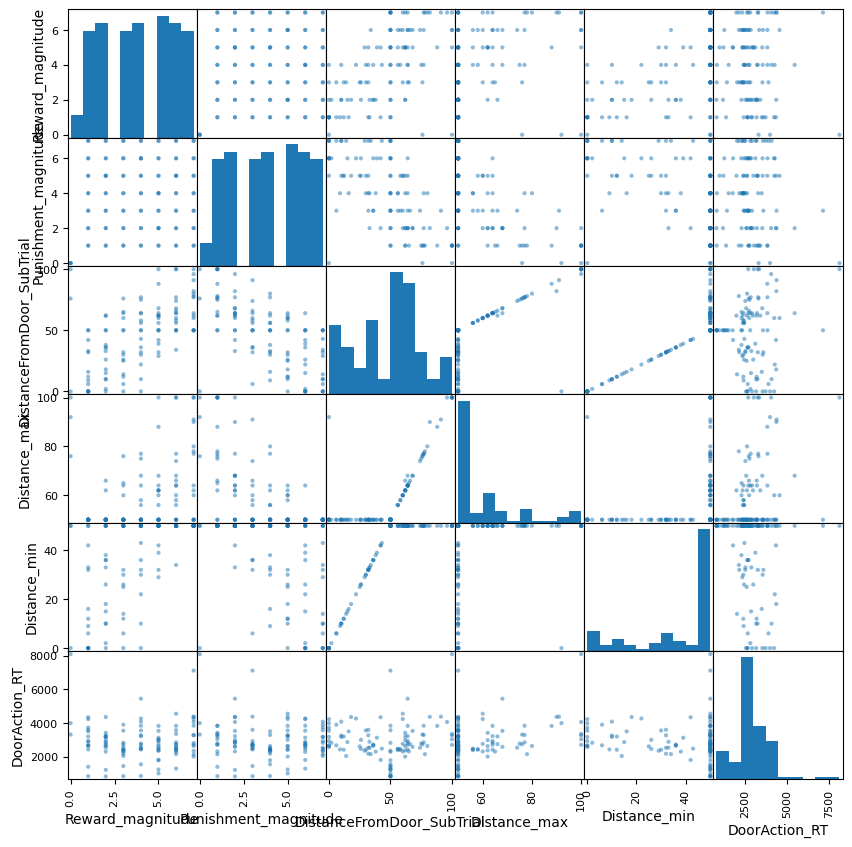

In [122]:
columns = ['Reward_magnitude', 'Punishment_magnitude',
           'DistanceFromDoor_SubTrial',
           'Distance_max', 'Distance_min',
           'DoorAction_RT']
pd.plotting.scatter_matrix(df[columns], figsize=(10, 10))

## Another Example

Let's take a look at the following file - `TIM_149_era.txt`.
Basically - This is a datafile that was created by a Matlab script, taking a EDA recording, parses it and creating events around signals we send to the BioPac during a TIM task.
Let's load the data and examine it:


In [124]:
era_file = pd.read_csv('TIM_149_era.txt', sep='\t', index_col=0)
era_file.head()

,CDA.nSCR,CDA.Latency,CDA.AmpSum,CDA.SCR,CDA.ISCR,CDA.PhasicMax,CDA.Tonic,TTP.nSCR,TTP.Latency,TTP.AmpSum,Global.Mean,Global.MaxDeflection,Event.NID,Event.Name
Event.Nr,,,,,,,,,,,,,,
1,1,2.8912,0.0111,0.0006,0.0885,0.0634,13.0976,0,NaN,0.0,13.1145,0.0016,95,95
2,1,1.0162,0.0111,0.0006,0.0962,0.0686,13.0502,0,NaN,0.0,13.0707,0.0011,20,20
3,1,3.5113,0.0108,0.0005,0.0859,0.0666,12.9050,0,NaN,0.0,12.9254,0.0019,21,21
4,4,0.1298,0.1570,0.0030,0.4767,0.1888,12.8161,0,NaN,0.0,12.8884,0.0160,22,22
5,3,0.6463,0.0716,0.0018,0.2923,0.1226,12.7467,0,NaN,0.0,12.8395,0.0018,23,23


We can see many numerical parameters, but can't make much sense of them, can we?
Well, for the meaning of each column we can take a look here - http://www.ledalab.de/documentation.htm
However, the most important thing at the moment is the last column - `Event.Name`. This column contain the numeric values we are sending to the BioPac machine, signaling the step the task is currently in, so we can cross them with the physiological signals and draw conclusions.

In TIM, we have a a dictionary describing the events sent, and what does each of them mean:

'break': hex(16),

'T2_square1': hex(20),
'T2_square2': hex(21),
'T2_square3': hex(22),
'T2_square4': hex(23),
'T2_square5': hex(24),
'T2_heat_pulse': hex(25),
'T2_PainRatingScale': hex(26),

'T4_square1': hex(40),
'T4_square2': hex(41),
'T4_square3': hex(42),
'T4_square4': hex(43),
'T4_square5': hex(44),
'T4_heat_pulse': hex(45),
'T4_PainRatingScale': hex(46),

'T6_square1': hex(60),
'T6_square2': hex(61),
'T6_square3': hex(62),
'T6_square4': hex(63),
'T6_square5': hex(64),
'T6_heat_pulse': hex(65),
'T6_PainRatingScale': hex(66),

'T8_square1': hex(80),
'T8_square2': hex(81),
'T8_square3': hex(82),
'T8_square4': hex(83),
'T8_square5': hex(84),
'T8_heat_pulse': hex(85),
'T8_PainRatingScale': hex(86),

'PreVas_rating': hex(90),
'MidRun_rating': hex(91),
'PostRun_rating': hex(92),

'Fixation_cross': hex(95),

'Start_Cycle': hex(100)

In order to make things easier for us to read and access, we can ***Add Columns*** to describe what we're seeing more conveniently.
We can use conditions, to place values according to some rules.
For example, let's make a rule that adds temperature description to every T_ related event.
Bear with me, it'll be fun.

In [133]:
era_file = era_file[era_file['Event.NID'] >= 20]
era_file = era_file[era_file['Event.NID'] <= 86]
era_file["Temp"] = np.select(condlist=[era_file['Event.NID'] // 20 == 1,
                              era_file['Event.NID'] // 40 == 1,
                              era_file['Event.NID'] // 60 == 1,
                              era_file['Event.NID'] // 80 == 1, ],
                             choicelist=["NoPain", "Low", "Medium", "High"], default="None")

era_file.head()

,CDA.nSCR,CDA.Latency,CDA.AmpSum,CDA.SCR,CDA.ISCR,CDA.PhasicMax,CDA.Tonic,TTP.nSCR,TTP.Latency,TTP.AmpSum,Global.Mean,Global.MaxDeflection,Event.NID,Event.Name,Temp
Event.Nr,,,,,,,,,,,,,,,
2,1,1.0162,0.0111,0.0006,0.0962,0.0686,13.0502,0,NaN,0.0,13.0707,0.0011,20,20,NoPain
3,1,3.5113,0.0108,0.0005,0.0859,0.0666,12.9050,0,NaN,0.0,12.9254,0.0019,21,21,NoPain
4,4,0.1298,0.1570,0.0030,0.4767,0.1888,12.8161,0,NaN,0.0,12.8884,0.0160,22,22,NoPain
5,3,0.6463,0.0716,0.0018,0.2923,0.1226,12.7467,0,NaN,0.0,12.8395,0.0018,23,23,NoPain
6,0,NaN,0.0000,0.0005,0.0732,0.0837,12.6392,0,NaN,0.0,12.6718,0.0033,24,24,NoPain


Let's go over what happened -
We created a new column called `Temp`, and using numpy `select` method we chose conditions, and the data we want to place in Temp in case the condition holds.
So,
* `Condlist` - a list of conditions for np.select to go over. It starts from the beginning, so if a condition at the beginning of the array applies on a row, the function won't continue to the next conditions.
* `choicelist` - a list of the data we want to place in the cell in case the corresponding condition applies
* `default` - what to put in the cell in case none of the rules apply.